<a href="https://colab.research.google.com/github/havardfa/ML_project_2022/blob/main/vari_layer_keras_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
# We import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
#----------------------------------------------------------------------------------------------------------------
# Import SciKitLearn for normalization and splitting of data
#----------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [19]:
import pandas as pd

import random
import numpy as np

random.seed(42)
np.random.seed(42)

filename =r'C:\Users\haavamfa\Documents\PhD\Abaqus_Preprocessed\with_length_and_time\scripted_thermal_048_nov_smallerbase_4layers_compressed.csv'
scaling_filename = r'C:\Users\haavamfa\Documents\PhD\Abaqus_Preprocessed\with_length_and_time\scripted_thermal_048_des_smallerbase_4layers_0,01speed_compressed.csv'
preditcion_filename = r'C:\Users\haavamfa\Documents\PhD\Abaqus_Preprocessed\with_length_and_time\scripted_thermal_048_jan_smallerbase_4layers_0045speed_compressed.csv'

data = np.loadtxt(filename, delimiter = ',',skiprows = 1, usecols = (2, 1, 3, 4, 5, 6, 7))
data_scaling = np.loadtxt(scaling_filename, delimiter = ',',skiprows = 1, usecols = (2, 1, 3, 4, 5, 6, 7))




In [14]:
scaler = preprocessing.MinMaxScaler().fit(data_scaling)
scaled_data = scaler.transform(data)

X_scaled = scaled_data[:,1:]
Y_scaled = scaled_data[:,0:1]

#Train/val/test split

X_train, X_val, Y_train, Y_val = train_test_split(X_scaled, Y_scaled,test_size = 0.2,random_state = 42)

#X_val, X_test, Y_val, Y_test = train_test_split(X_rem, Y_rem, test_size = 0.5, random_state=42)


In [16]:
optim = tf.keras.optimizers.Adam(lr=2e-3)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=64, activation='relu',input_shape=(6,)))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=2, activation='linear'))
model.compile(loss='mae', optimizer=optim)

In [17]:
history = model.fit(X_train, Y_train, epochs=5,validation_data=(X_val,Y_val), verbose=0)

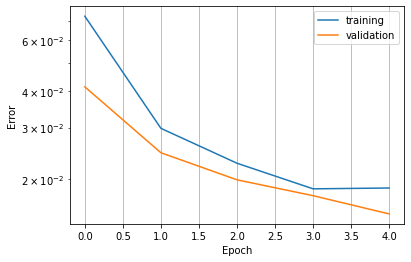

In [18]:
plt.rcParams["figure.figsize"] = (20, 10)
fig,axs = plt.subplots(1,1)
# Plot training/validation loss
axs.semilogy(history.history['loss'],label='training')
axs.semilogy(history.history['val_loss'],label='validation')
axs.set_xlabel('Epoch')
axs.set_ylabel('Error')
axs.legend()
axs.grid()


In [ ]:
data_prediction = np.loadtxt(preditcion_filename,delimiter=',',skiprows = 1, usecols = (2, 1, 3, 4, 5, 6, 7))

scaled_prediction_data = scaler.transform(data_prediction)

X_prediction_scaled = scaled_prediction_data[:,1:]
Y_prediction_scaled = scaled_prediction_data[:,0:1]

fast_system_prediction = model.predict(X_prediction_scaled)

plt.rcParams["figure.figsize"] = (15, 10)
fig,axs = plt.subplots(1,2)
axs[0].scatter(Y_prediction_scaled,fast_system_prediction)
axs[0].plot([0,1200],[0,1200])
axs[0].set_xlabel('Measured')
axs[0].set_ylabel('Predicted')
axs[0].grid()